##  Programmieraufgabe 4: Konvergenz ins Gleichgewicht

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [18]:
# some setup
%matplotlib inline
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plot.[name of command]

from ipywidgets import interactive
import random
random.seed("MirkisUsoltsevaLevchenko")

Wir betrachten eine Markov-Kette $(X_n)_{n\geq 0}$ mit Zustandsraum $S=\{0,1,\ldots,N-1\}$, $N\geq2$, und Übergangsmatrix 
\begin{equation} 
    P=  \begin{bmatrix} 0 & 1 & 0 & \cdots & 0 \\ q & 0 & p & \ddots & \vdots \\ 0 & \ddots & \ddots & \ddots & 0 \\ \vdots & \ddots & q & \ddots & p\\ 0 & \cdots & 0 & 1 & 0 
        \end{bmatrix}
\end{equation} 
für $0\leq p\leq1$ und $q=1-p$. Im folgenden identifizieren wir eine Wahrscheinlichkeitsverteilung $\mu$ auf $S$ stets mit ihrer Massenfunktion $m$, die wir durch ein array (einen Zeilenvektor) $m=(m(x))_{0\leq x\leq N-1}$ darstellen.

Die Massenfunktion $m_{inv}$ der Gleichgewichtsverteilung von $P$ ist proportional zu $\nu=(\nu (0),\dotsc, \nu ({N-1}))$ mit $$\nu (0)=1,\quad\nu (i)=p^{i-1}/q^{i}\text{ für }1\leq i \leq N-2,\quad\text{und}\quad\nu (N-1)=p^{N-2}/q^{N-2}.$$

a) Definieren Sie eine Funktion $\texttt{minv}$ mit Input $N$ und $p$, die $m_{inv}=(m_{inv}(x))_{0\leq x\leq N-1}$ ausgibt.

b) Erstellen Sie Plots von $m_{inv}$ für $N=50,p=1/2$ und $N=50,p=0.55$.

[0.1901108  0.42246845 0.51635033 0.63109485 0.34710217]


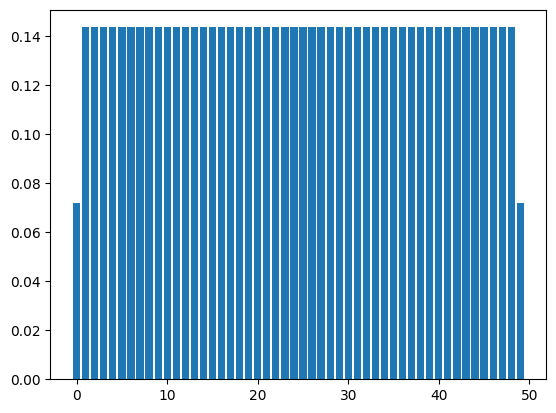

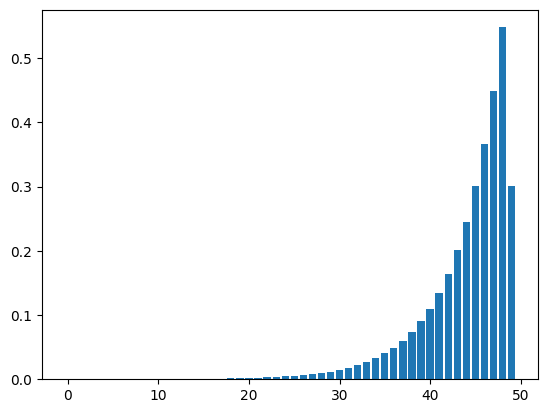

In [19]:
#(a)
def minv(N : int, p : float) -> np.array:
    vector = np.zeros(N)
    vector[0] = 1
    for i in range(1, N):
        vector[i] = p**(i-1) / (1-p)**i
    vector[-1] = p**(N-2) / (1-p)**(N-2)

    return vector / np.linalg.norm(vector)

print(minv(5, 0.55))

#(b)
plt.bar(np.arange(0, 50), minv(50, 0.5))
plt.show()
plt.bar(np.arange(0, 50), minv(50, 0.55))
plt.show()

(c) Definieren Sie eine Funktion $\texttt{Transition}$, deren Input $N,p$ und die Verteilung $m0$ der Markov-Kette zu einem bestimmten Zeitpunkt sind, und die die Verteilung der Markov-Kette nach einem weiteren Schritt ausgibt. Testen Sie Ihre Funktion für $N=50$ und $p=0.55$ mit $\texttt{print(minv(N,p)-Transition(N,p,minv(N,p)))}$ (sie sollten bis auf Rundungsfehler $0$ erhalten).



In [17]:
#(c)
def create_markov_chain(N : int, p : int) -> np.array:
    matrix = np.zeros(N**2).reshape(N, N)
    matrix[0][1] = 1
    matrix[N-1][N-2] = 1
    
    for i in range(1, N-1):
        matrix[i][i-1] = 1-p
        matrix[N-1-i][N-i] = p
    
    return matrix

def Transition(N : int, p : int , m0 : np.array) -> np.array:
    matrix = create_markov_chain(N, p)
    return np.matmul(m0, matrix)

print (minv(5, 0.55) - Transition(5, 0.55, minv(5, 0.55))) #e-16 ist fast 0 :)

[ 2.77555756e-17 -5.55111512e-17  1.11022302e-16 -1.11022302e-16
  5.55111512e-17]


(d) Definieren Sie für die Anfangsbedingung $\mathbb P[X_0=0]=1$ eine Funktion mit einer Schrittzahl $t$ als Input und einem Plot der Verteilung der Markov-Kette nach $t$ Schritten als Output.

Erstellen Sie für $N=50$, $p=.55$ und $T=1000$ einen interaktiven Plot der Verteilung von $X_t$ für $t=0,1,\ldots ,T$. Was beobachten Sie? Scheint die Verteilung zu konvergieren?

In [25]:
#(d)
def plot_Nsteps_distribution(T : int):
    start = np.zeros(50)
    start[0] = 1
    matrix = create_markov_chain(50, 0.55)

    for i in range(T):
        start = np.matmul(start, matrix)
    
    plt.bar(np.arange(0, 50), start)
    plt.show()

interactive(plot_Nsteps_distribution, T = (0, 1001, 1))

#Die Verteilung scheint zu konvergieren
    

interactive(children=(IntSlider(value=500, description='T', max=1001), Output()), _dom_classes=('widget-intera…

(e) Sei $\varepsilon=0.1$. Wir betrachten nun eine modifizierte Markov-Kette, die mit Wahrscheinlichkeit $\varepsilon$ in $0$ bzw. $N-1$ bleibt, und mit Wahrscheinlichkeit $1-\varepsilon$ nach $1$ bzw. $N-2$ springt. Definieren Sie analog zu oben eine Funktion $\texttt{TransitionEps}$, die die Übergänge der modifizierten Markov-Kette berechnet.

Ist die Verteilung $\texttt{minv(N,p)}$ noch invariant?

Wiederholen Sie (d) mit der modifizierten Markov-Kette. Was können Sie zu der Konvergenz sagen?



In [35]:
#(e)
def create_epsilon_markov_chain(N : int, p : int, eps : float) -> np.array:
    matrix = np.zeros(N**2).reshape(N, N)
    matrix[0][0] = eps
    matrix[N-1][N-1] = eps
    matrix[0][1] = 1 - eps
    matrix[N-1][N-2] = 1 - eps
    
    for i in range(1, N-1):
        matrix[i][i-1] = 1-p
        matrix[N-1-i][N-i] = p
    
    return matrix

def TransitionEps(N : int, p : int, eps : float, m0 : np.array) -> np.array:
    matrix = create_epsilon_markov_chain(N, p, eps)
    return np.matmul(m0, matrix)

print(minv(5, 0.55) - TransitionEps(5, 0.55, 0.1, minv(5, 0.55))) 
#minv(N,p) ist nicht mehr invariant

def plot_Nsteps_eps_distribution(T : int):
    start = np.zeros(50)
    start[0] = 1
    matrix = create_epsilon_markov_chain(50, 0.55, 0.1)

    for i in range(T):
        start = np.matmul(start, matrix)
    
    plt.bar(np.arange(0, 50), start)
    plt.show()
interactive(plot_Nsteps_eps_distribution, T = (0, 1001, 1))
#die modifizierte Markov-kette konvergiert

[-1.90110804e-02  1.90110804e-02  1.11022302e-16  3.47102167e-02
 -3.47102167e-02]
minv(N,p) is not invariant


interactive(children=(IntSlider(value=500, description='T', max=1001), Output()), _dom_classes=('widget-intera…

(f) Berechnen Sie für $t=0,1,\ldots 2000$ die totale Variationsdistanz $$D(t)\ =\ \frac 12\sum_{j=0}^{N-1} |minv (j)- m_t(j)|$$ zwischen der Verteilung $m_t$ der modifizierten Kette zur Zeit $t$ und der Gleichgewichtsverteilung.

Erstellen Sie Plots von $(t,D(t))$ und $(t,\log(D(t)))$ für ${t\le 2000}$.

Was können Sie über die Konvergenzgeschwindigkeit zur Gleichgewichtsverteilung aussagen?

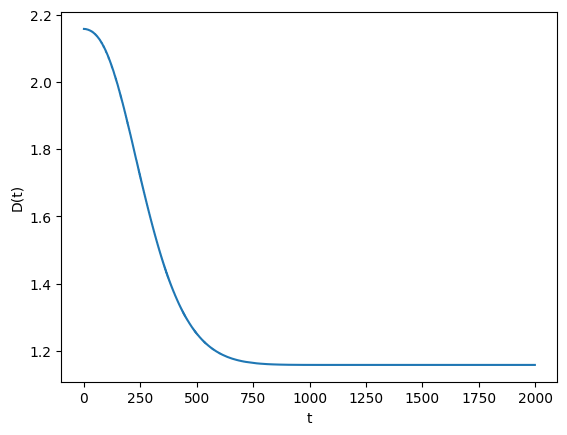

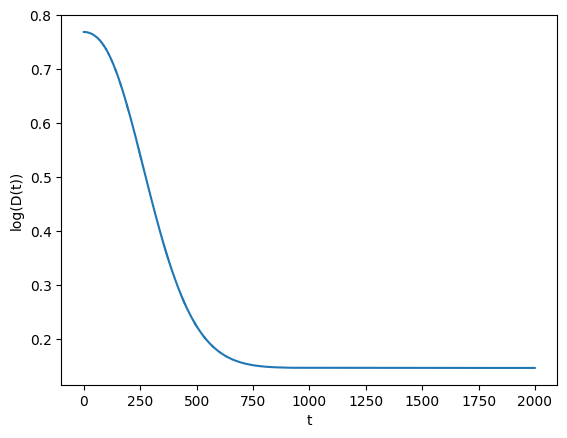

In [50]:
#(f)
def variation_distance(N : int, p : float, T : int) -> float:
    m_t = np.zeros(50)
    m_t[0] = 1
    matrix = create_markov_chain(N, p)
    for i in range(T):
        m_t = np.matmul(m_t, matrix)
    
    difference = np.abs(minv(N, p) - m_t)
    return (np.sum(difference) / 2)

variation_distance(50, 0.55, 100)

t = 2000
N = 50
p = 0.55

list = np.zeros(t)
log_list = np.zeros(t)
for i in range(t):
    list[i] = variation_distance(N, p, i)
    log_list[i] = np.log(variation_distance(N, p, i))

plt.plot(list)
plt.xlabel("t")
plt.ylabel("D(t)")
plt.show()

plt.plot(log_list)
plt.xlabel("t")
plt.ylabel("log(D(t))")
plt.show()
#schon bei t = 1000 ist log(D(t)) in der Nähe von 0